In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Graph:
    
    def __init__(self):
        self.graph=dict()
        
        
    def addEdge(self,u,v):
        if u not in self.graph:
            self.graph[u]=[v]
        else:
            self.graph[u].append(v)
        
        

            
    def graphViz(self, seed, scale=(1,10), size=(5,5), title="Graph Visualisation",d=0.1):
        graph=self.graph
        plt.figure(figsize=size)
        plt.title(title)
        np.random.seed(seed)
        drawn=dict() 

        for key in graph.keys():
            x=np.random.randint(scale[0],scale[1])
            y=np.random.randint(scale[0],scale[1])
            plt.plot(x,y,'o')
            plt.text(x+d,y+d,  key)
            if key not in drawn.keys():
                drawn[key]=[x,y]
            else:
                pass

        for key in graph.keys():
            for val in graph[key]:
                if val not in drawn.keys():
                    x=np.random.randint(scale[0],scale[1])
                    y=np.random.randint(scale[0],scale[1])
                    plt.plot(x,y,'o')
                    plt.text(x+d,y+d,  val)
                    drawn[val]=[x,y]
                else:
                    pass
        for key in graph.keys():
            v1=key
            x1=drawn[v1][0]
            y1=drawn[v1][1]
            for v2 in graph[v1]:
                x2=drawn[v2][0]
                y2=drawn[v2][1]

                plt.plot([x1,x2],[y1,y2])
        plt.xticks(())
        plt.yticks(())
        plt.xlabel("SEED= "+str(seed)+"  | "+
                   " SCALE: ("+str(scale[0])+','+str(scale[1])+")"+ 
                   "  |  SIZE: ("+str(size[0])+','+str(size[1])+")"+
                   "  |  d= "+str(d))
        plt.show()


In [6]:
g = Graph() 
g.addEdge(1, 3) 
g.addEdge(1, 2) 
g.addEdge(2, 5) 
g.addEdge(2, 4) 
g.addEdge(3, 5) 
g.addEdge(4, 5) 
g.addEdge(4, 6) 
g.addEdge(5, 6) 
g.addEdge(5, 7) 
g.addEdge(2, 7) 
g.addEdge(7, 8) 
g.addEdge(8, 5) 

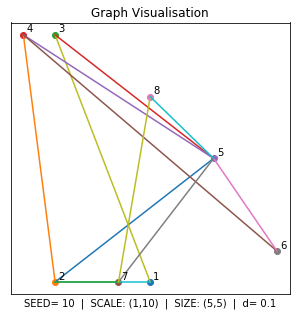

In [7]:
g.graphViz(10)

In [8]:
def graphViz(graph, seed, scale=(1,10), size=(5,5), title="Graph Visualisation",d=0.1,arr_size=0.01):
    plt.figure(figsize=size)
    plt.title(title)
    np.random.seed(seed)
    drawn=dict()
    for key in graph.keys():
        x=np.random.randint(scale[0],scale[1])
        y=np.random.randint(scale[0],scale[1])
        plt.plot(x,y,'o')
        plt.text(x+d,y+d,  key)
        if key not in drawn.keys():
            drawn[key]=[x,y]
        else:
            pass
        
    for key in graph.keys():
        for val in graph[key]:
            if val not in drawn.keys():
                x=np.random.randint(scale[0],scale[1])
                y=np.random.randint(scale[0],scale[1])
                plt.plot(x,y,'o')
                plt.text(x+d,y+d,  val)
                drawn[val]=[x,y]
            else:
                pass
    for key in graph.keys():
        v1=key
        x1=drawn[v1][0]
        y1=drawn[v1][1]
        for v2 in graph[v1]:
            x2=drawn[v2][0]
            y2=drawn[v2][1]
            
            plt.arrow(x1,y1,-x1+x2,-y1+y2,length_includes_head=True, head_width=arr_size)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel("SEED= "+str(seed)+"  | "+
               " SCALE: ("+str(scale[0])+','+str(scale[1])+")"+ 
               "  |  SIZE: ("+str(size[0])+','+str(size[1])+")"+
               "  |  d= "+str(d))
    plt.legend(title="Pulkit Mehta",framealpha=0.5 )
    plt.show()
    

No handles with labels found to put in legend.


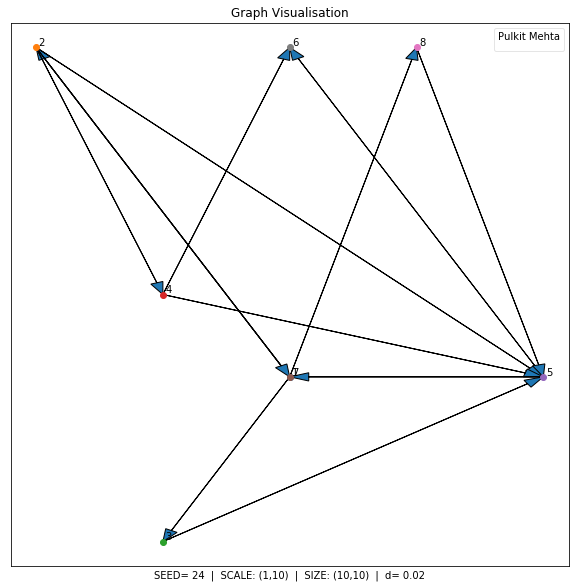

In [9]:
graphViz(g.graph,24,d=0.02, size=(10,10), arr_size=0.1)